## Análisis de Datos de MNIST


In [3]:
from sklearn.datasets import fetch_openml
from sklearn.manifold import Isomap, TSNE, LocallyLinearEmbedding
import numpy as np
import matplotlib.pyplot as plt

# Cargar y preparar los datos
def cargar_datos():
    # Cargar MNIST
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

    # Filtrar solo los números 1 y 7
    mask = np.logical_or(y == '1', y == '7')
    X = X[mask]
    y = y[mask]

    return X, y

In [20]:
# Función para visualizar resultados

def visualizar_resultados(X_reduced, y, titulo):
    plt.figure(figsize=(5, 3.3))
    scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=(y == '7'), cmap='coolwarm', alpha=0.45, marker='o')
    plt.xticks([])
    plt.yticks([])
    plt.title(titulo)
    plt.show()

In [26]:
# Funciones para cada método (ISOMAP, T-SNE, LLE)
def probar_isomap(X, y, n_neighbors_list=[5, 15, 30]):
    for n_neighbors in n_neighbors_list:
        isomap = Isomap(n_components=2, n_neighbors=n_neighbors)
        X_isomap = isomap.fit_transform(X)
        visualizar_resultados(X_isomap, y, f'ISOMAP - knn:{n_neighbors}')

def probar_tsne(X, y, perplexity_list=[10, 100, 1000]):
    for perplexity in perplexity_list:
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
        X_tsne = tsne.fit_transform(X)
        visualizar_resultados(X_tsne, y, f'T-SNE - perplexity:{perplexity}')

def probar_lle(X, y, n_neighbors_list=[5, 15, 30]):
    for n_neighbors in n_neighbors_list:
        lle = LocallyLinearEmbedding(n_components=2, n_neighbors=n_neighbors)
        X_lle = lle.fit_transform(X)
        visualizar_resultados(X_lle, y, f'LLE - knn:{n_neighbors}')

In [8]:
# Cargar datod desde sklearn.datasets
print("Cargando datos MNIST...")
X, y = cargar_datos()

Cargando datos MNIST...


In [9]:
# Tomar una muestra para acelerar el proceso (opcional)
sample_size = 1010
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_sample = X[indices]
y_sample = y[indices]

### Gráficas de cada modelo

Probando ISOMAP...


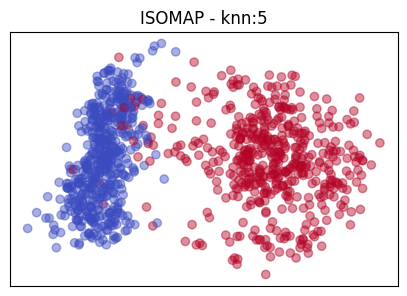

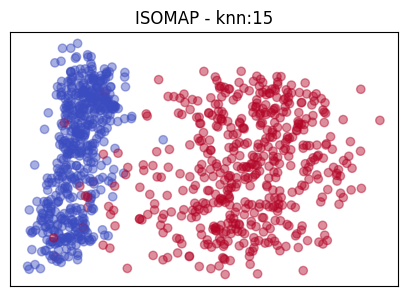

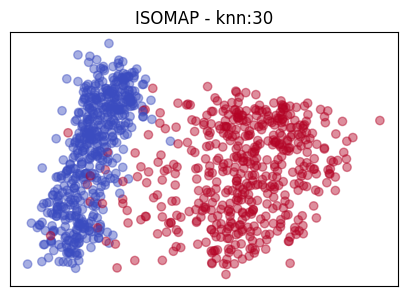

In [22]:
print("Probando ISOMAP...")
probar_isomap(X_sample, y_sample)

Probando LLE...


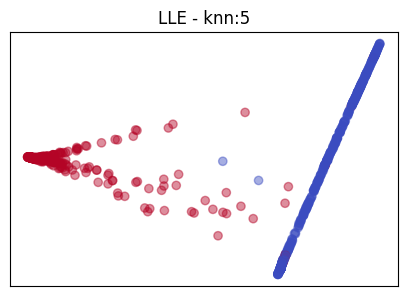

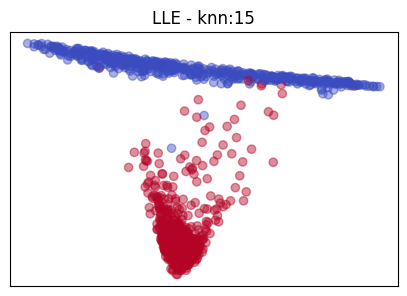

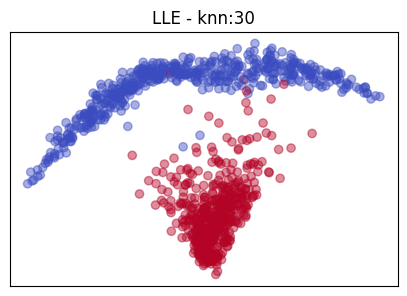

In [25]:
print("Probando LLE...")
probar_lle(X_sample, y_sample)

Probando T-SNE...


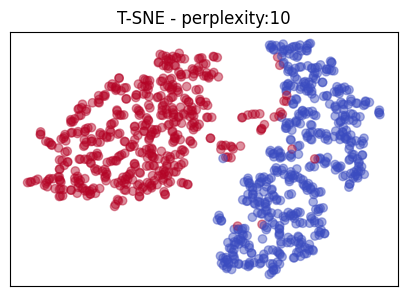

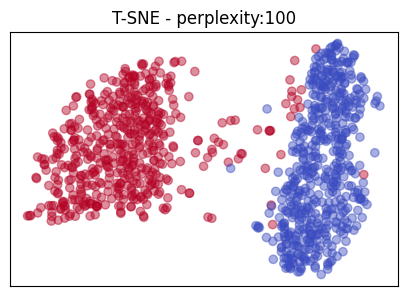

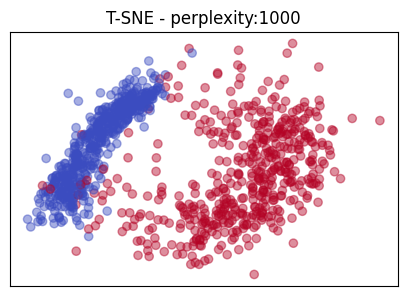

In [27]:
print("Probando T-SNE...")
probar_tsne(X_sample, y_sample)